Name

Labpartner(s)

In [43]:
#import statements go here
from scipy import stats
import pandas as pd

# Class 12.2

# Warmups 11.2

**W.1.** In the scipy lecture notes on statistics go through **Section 3.1.2 Hypothesis testing: comparing two groups** tutorial. Make sure to read up about t-tests and the rest if you are not familiar with these statistical methods.
https://scipy-lectures.org/packages/statistics/index.html#id13

Note you will need to load in the dataset on brains at the beginning of the section

It is suggested you do the rest of the 3.1 section for practice this week. Most of it is review, some of it is new and useful for you all.

#MYNote:A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [44]:
from scipy import stats

In [42]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [10]:
#
stats.ttest_1samp(data['VIQ'], 0) 


Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [11]:
#2-sample t-test: testing for difference across populations2-sample t-test: testing for difference across populations
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

#3.1.2.2. Paired tests: repeated measurements on the same individuals
PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [12]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [13]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   


Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [14]:
#This is equivalent to a 1-sample test on the difference:

stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [15]:
#T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

EXERCISE!! ------------------------------------------------------------------------

Test the difference between weights in males and females.
Use non parametric statistics to test the difference between VIQ in males and females.

In [16]:
stats.ttest_1samp(data['Weight'], 0)   

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [17]:
data.dropna()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466
10,11,Female,132,129,124,118.0,64.5,833868


In [18]:
stats.ttest_1samp(data['Weight'], 0)   

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [19]:
stats.mannwhitneyu(male_viq, female_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.17114434343636575)

# Lecture 12.2

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Hycom-CartopyDemo%20-%20updated.ipynb

In [45]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [21]:
date1 = datetime(1996,1,1) 

In [22]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [23]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [24]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m-%d-%Y")

'01-01-1996'

In [25]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [26]:
print(date2)

1996-01-01 13:34:06


In [27]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [28]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2021, 4, 11, 21, 39, 28, 929093)

#### If we want to increment the date we can use timedelta

In [29]:
date1 = date1 + timedelta(days=1) #added a day to the date1
print(date1)

1996-01-02 00:00:00


In [30]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [31]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [32]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [33]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize=False,
    name=None,
    closed=None,
    **kwargs,
) -> pandas.core.indexes.datetimes.DatetimeIndex
Docstring:
Return a fixed frequency DatetimeIndex.

Parameters
----------
start : str or datetime-like, optional
    Left bound for generating dates.
end : str or datetime-like, optional
    Right bound for generating dates.
periods : int, optional
    Number of periods to generate.
freq : str or DateOffset, default 'D'
    Frequency strings can have multiples, e.g. '5H'. See
    :ref:`here <timeseries.offset_aliases>` for a list of
    frequency aliases.
tz : str or tzinfo, optional
    Time zone name for returning localized DatetimeIndex, for example
    'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
    timezone-naive.
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range.
name : str, default None
    Name 

In [34]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [35]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00', freq='D')

In [37]:
print(my_daterange[1])

2018-01-02 00:00:00


In [38]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [39]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [ ]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv')

In [60]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [61]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,  #6thb line is the header
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [62]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<AxesSubplot:xlabel='Year'>

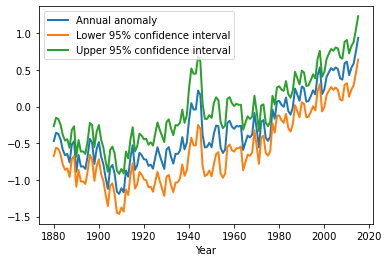

In [63]:
sst.plot()

In [64]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<AxesSubplot:xlabel='Year'>

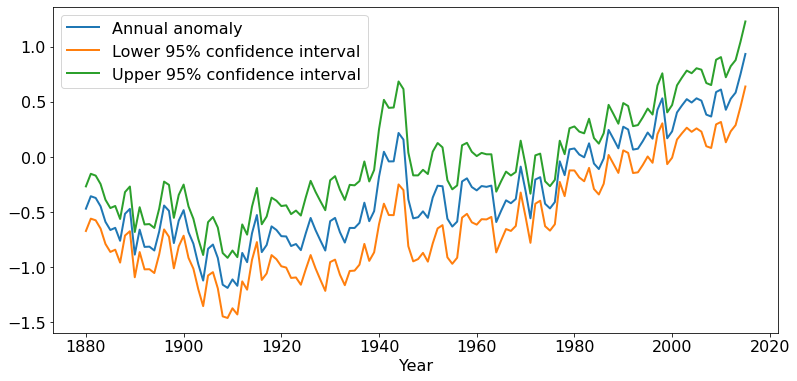

In [65]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [66]:
import xarray as xr

In [67]:
sst_ds = sst.to_xarray()

In [68]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [69]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [70]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [71]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

In [72]:
from scipy import stats

In [73]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [74]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704, intercept_stderr=1.104806345521059)

In [75]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- rate = F/year

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?

In [76]:
# x is time

In [77]:
#y is slope

How good of a fit is this for the last few decades?

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

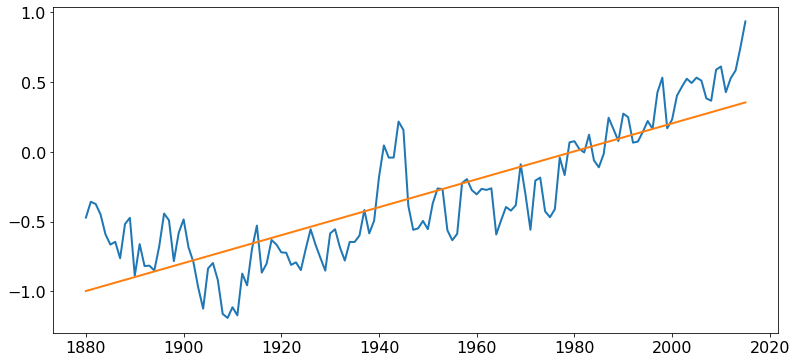

In [78]:
import matplotlib.pyplot as plt
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)


In [79]:
sst_ds["Annual anomaly"][100:]


<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [80]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [81]:
#fitting of the data
ssta_trend_1980 = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])
ssta_trend_1980

LinregressResult(slope=0.020711260308880312, intercept=-41.05951991698843, rvalue=0.8829830021529423, pvalue=1.0383113887943804e-12, stderr=0.0018882626420977894, intercept_stderr=3.7718556347573635)

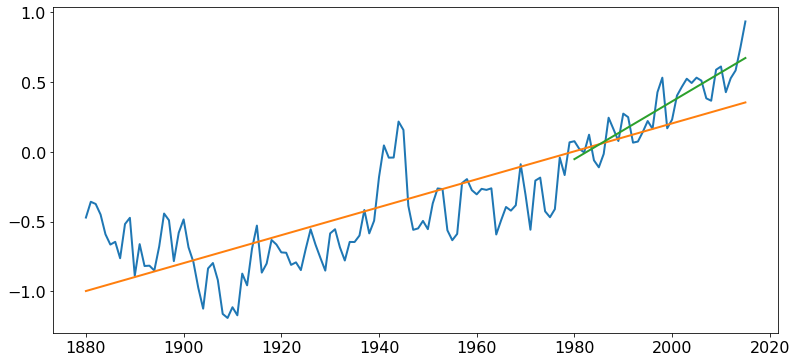

In [82]:
import matplotlib.pyplot as plt
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980.slope*sst_ds.Year[100:] + ssta_trend_1980.intercept)

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

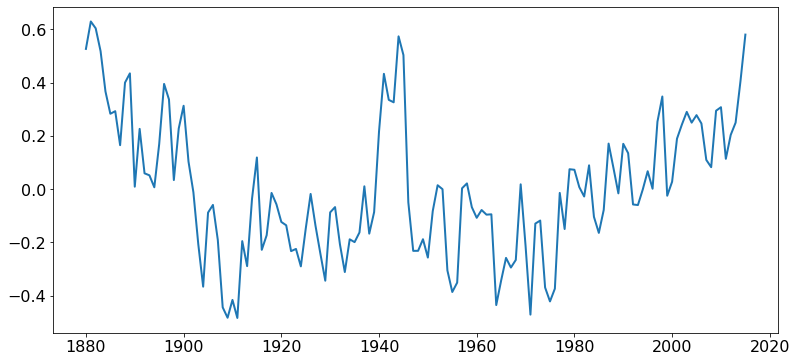

In [83]:
#subtract the trend , take y values from trend line then subtract to the anomaly data

trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept  # y =mx+b
sst_detrended = sst_ds["Annual anomaly"] - trend_entire         

plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?


I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year

pseudo code:

create an array to save the new data in

Loop through all the years take a mean of the current, previous and next years, save to some new arrray

In [84]:
import numpy as np

In [85]:
sst_ds["Annual anomaly"].shape #look how many array

(136,)

In [86]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index "135"
    #print(i) # not skipping the first index
    ssta_filtered[i] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3
    # previous years + present + next year

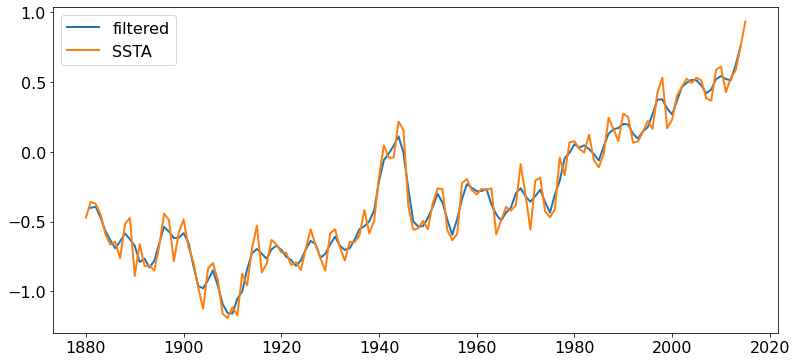

In [87]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.2

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [88]:
import numpy as np
from datetime import datetime, timedelta
mybday = datetime(1996,4,19)  #y,m,d
mybday

datetime.datetime(1996, 4, 19, 0, 0)

In [89]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, v

In [90]:
#timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
mybday10 = mybday + timedelta(weeks =10)
print(mybday10)  #10 year

1996-06-28 00:00:00


In [91]:
#Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) 
mybday5 = mybday + timedelta( minutes =5) 
print(mybday5)

1996-04-19 00:05:00


In [92]:
mybday2y = mybday + timedelta(days =365.25*2) 
print(mybday2y)

1998-04-19 12:00:00


**E.2** Define a daterange for your birthday every year of your life

In [93]:
my_bday = pd.date_range(start='1996/4/19', periods=26, freq = '365.25D')
print(my_bday) #THIS took me a looooooooooooooooonggggggg timeeeee

DatetimeIndex(['1996-04-19 00:00:00', '1997-04-19 06:00:00',
               '1998-04-19 12:00:00', '1999-04-19 18:00:00',
               '2000-04-19 00:00:00', '2001-04-19 06:00:00',
               '2002-04-19 12:00:00', '2003-04-19 18:00:00',
               '2004-04-19 00:00:00', '2005-04-19 06:00:00',
               '2006-04-19 12:00:00', '2007-04-19 18:00:00',
               '2008-04-19 00:00:00', '2009-04-19 06:00:00',
               '2010-04-19 12:00:00', '2011-04-19 18:00:00',
               '2012-04-19 00:00:00', '2013-04-19 06:00:00',
               '2014-04-19 12:00:00', '2015-04-19 18:00:00',
               '2016-04-19 00:00:00', '2017-04-19 06:00:00',
               '2018-04-19 12:00:00', '2019-04-19 18:00:00',
               '2020-04-19 00:00:00', '2021-04-19 06:00:00'],
              dtype='datetime64[ns]', freq='8766H')


**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [94]:
my_bday.strftime("%m-%d-%Y")

Index(['04-19-1996', '04-19-1997', '04-19-1998', '04-19-1999', '04-19-2000',
       '04-19-2001', '04-19-2002', '04-19-2003', '04-19-2004', '04-19-2005',
       '04-19-2006', '04-19-2007', '04-19-2008', '04-19-2009', '04-19-2010',
       '04-19-2011', '04-19-2012', '04-19-2013', '04-19-2014', '04-19-2015',
       '04-19-2016', '04-19-2017', '04-19-2018', '04-19-2019', '04-19-2020',
       '04-19-2021'],
      dtype='object')

**E.4** Go through the tutorial on datetimes in pandas here: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587 Type in all the examples here in the lab.

In [167]:
#1 Convert strings to datetime
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [168]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [169]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [170]:
# Make up 3000 rows
df = pd.DataFrame({'date': ['3/11/2000', '3/12/2000', '3/13/2000'] * 1000 })
%timeit pd.to_datetime(df['date'], infer_datetime_format=True)
100 loops, best of 3: 10.4 ms per loop
%timeit pd.to_datetime(df['date'], infer_datetime_format=False)
1 loop, best of 3: 471 ms per loop

SyntaxError: invalid syntax (<ipython-input-170-cb6f930d2164>, line 4)

In [171]:
df['date'] = pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [172]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [173]:
# 2. Assemble a datetime from multiple columns
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df['date'] = pd.to_datetime(df)
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [174]:
#3. Get year, month, and day
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df['DoB'] = pd.to_datetime(df['DoB'])
df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df


,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [175]:
#4. Get the week of year, the day of week and leap year
df['week_of_year'] = df['DoB'].dt.week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

<ipython-input-175-c92ebdd8d942>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['DoB'].dt.week


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [176]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'  } 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


In [177]:
# 5. Get the age from the date of birth
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,25
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,26


In [178]:
#6. Improve performance by setting date column as the index
df = pd.read_csv('Water well(1).csv',parse_dates=['datetime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36310 entries, 0 to 36309
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            36310 non-null  datetime64[ns]
 1   timezone            36310 non-null  object        
 2   waterlvl            36310 non-null  float64       
 3   battery_voltage(v)  0 non-null      float64       
 4   source              36310 non-null  object        
 5   status              36310 non-null  object        
 6   comment             0 non-null      float64       
 7   Unnamed: 7          0 non-null      float64       
 8   Unnamed: 8          1 non-null      object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 2.5+ MB


In [179]:
df = df.set_index(['datetime'])
df

,timezone,waterlvl,battery_voltage(v),source,status,comment,Unnamed: 7,Unnamed: 8
datetime,,,,,,,,
2021-02-04 12:42:00,-06:00,28.11,NaN,datalogger,R,NaN,NaN,NaN
2021-02-04 11:42:00,-06:00,28.08,NaN,datalogger,R,NaN,NaN,NaN
2021-02-04 10:42:00,-06:00,28.05,NaN,datalogger,R,NaN,NaN,NaN
2021-02-04 09:42:00,-06:00,28.05,NaN,datalogger,R,NaN,NaN,NaN
2021-02-04 08:42:00,-06:00,28.05,NaN,datalogger,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-12-14 20:00:00,-06:00,28.18,NaN,datalogger,R,NaN,NaN,NaN
2016-12-14 19:00:00,-06:00,28.20,NaN,datalogger,R,NaN,NaN,NaN
2016-12-14 18:00:00,-06:00,28.22,NaN,datalogger,R,NaN,NaN,NaN


In [180]:
#7. Select data with a specific year and perform aggregation
df.loc['2018']


,timezone,waterlvl,battery_voltage(v),source,status,comment,Unnamed: 7,Unnamed: 8
datetime,,,,,,,,
2018-12-31 23:29:00,-06:00,25.50,NaN,datalogger,R,NaN,NaN,NaN
2018-12-31 22:29:00,-06:00,25.51,NaN,datalogger,R,NaN,NaN,NaN
2018-12-31 21:29:00,-06:00,25.51,NaN,datalogger,R,NaN,NaN,NaN
2018-12-31 20:29:00,-06:00,25.52,NaN,datalogger,R,NaN,NaN,NaN
2018-12-31 19:29:00,-06:00,25.53,NaN,datalogger,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 04:00:00,-06:00,28.36,NaN,datalogger,R,NaN,NaN,NaN
2018-01-01 03:00:00,-06:00,28.37,NaN,datalogger,R,NaN,NaN,NaN
2018-01-01 02:00:00,-06:00,28.38,NaN,datalogger,R,NaN,NaN,NaN


In [181]:
df.loc['2018-5']

,timezone,waterlvl,battery_voltage(v),source,status,comment,Unnamed: 7,Unnamed: 8
datetime,,,,,,,,
2018-05-31 23:09:00,-06:00,29.79,NaN,datalogger,R,NaN,NaN,NaN
2018-05-31 22:09:00,-06:00,29.81,NaN,datalogger,R,NaN,NaN,NaN
2018-05-31 21:09:00,-06:00,29.82,NaN,datalogger,R,NaN,NaN,NaN
2018-05-31 20:09:00,-06:00,29.84,NaN,datalogger,R,NaN,NaN,NaN
2018-05-31 19:09:00,-06:00,29.84,NaN,datalogger,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-05-01 04:09:00,-06:00,29.34,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 03:09:00,-06:00,29.34,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 02:09:00,-06:00,29.32,NaN,datalogger,R,NaN,NaN,NaN


In [182]:
df.loc['2018-5-1']

,timezone,waterlvl,battery_voltage(v),source,status,comment,Unnamed: 7,Unnamed: 8
datetime,,,,,,,,
2018-05-01 23:09:00,-06:00,29.31,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 22:09:00,-06:00,29.33,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 21:09:00,-06:00,29.36,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 20:09:00,-06:00,29.38,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 19:09:00,-06:00,29.40,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 18:09:00,-06:00,29.40,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 17:09:00,-06:00,29.40,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 16:09:00,-06:00,29.38,NaN,datalogger,R,NaN,NaN,NaN
2018-05-01 15:09:00,-06:00,29.36,NaN,datalogger,R,NaN,NaN,NaN


In [162]:
#9 Select data between two dates
df.loc['2018' : '2021']

,timezone,waterlvl,battery_voltage(v),source,status,comment,Unnamed: 7,Unnamed: 8
datetime,,,,,,,,


#10 Handle missing values
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill') #backfill will input the numbers that is ahead of the blank data
df.head()
#my own data does not have a column that has NAN values and has values after


**E.5** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [104]:
#st_ds["Annual anomaly"][60:91]
ssta_trend_1940_70 = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])
#ta_trend_1980 = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])
ssta_trend_1940_70

LinregressResult(slope=-0.008184913548387096, intercept=15.69453642580645, rvalue=-0.33625811590031707, pvalue=0.06437970871891731, stderr=0.00425683789714022, intercept_stderr=8.322205184880938)

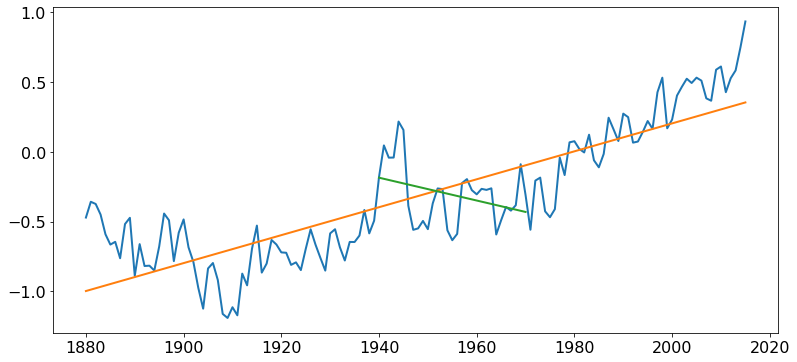

In [105]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[60:91], ssta_trend_1940_70.slope*sst_ds.Year[60:91] + ssta_trend_1940_70.intercept)
#plt.plot(sst_ds.Year[60:91], ssta_trend_1980.slope*sst_ds.Year[60:91] + ssta_trend_1980.intercept)

#Negative trend
#The R-value is very small that the correlation is almost negligible
#P is bove significance level (a= 0.05). The correlation is not statistically significant

**E.6** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.


The cooling happened during the mid-century resulted from high concentration of sulphate aerosols in the atm. released by volcanic eruptios and inustrial activities (Brahic, 2007)


Brahic, C. (2007). Climate myths: The cooling after 1940 shows CO<SUB>2</SUB> does not cause warming. Retrieved 12 April 2021, from https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/


**E.7** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

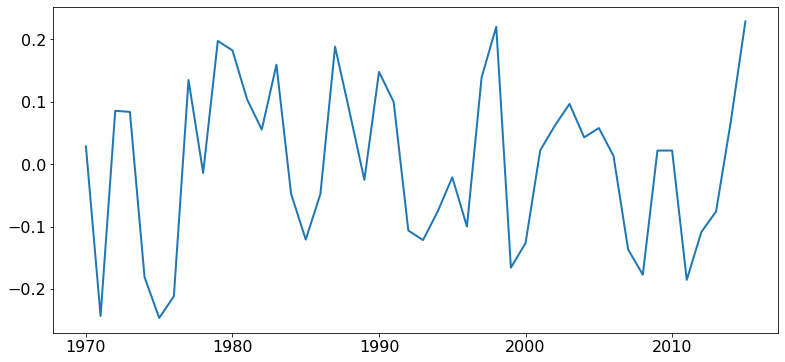

In [127]:
#st_ds["Annual anomaly"][91]
ssta_trend_1970 = stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])
trend_entire_1970 = ssta_trend_1970.slope*sst_ds.Year[90:] + ssta_trend_1970.intercept  # y =mx+b
sst_detrended_1970 = sst_ds["Annual anomaly"][90:] - trend_entire_1970         

plt.plot(sst_ds.Year[90:], sst_detrended_1970)





**E.8** (Advanced) Perform a five year moving average of your detrended data from E.7. Explain your result in relation to the periodicity of ENSO.

In [114]:
sst_ds["Annual anomaly"][90:].shape

(46,)

In [113]:
sst_ds.Year[90:]

<xarray.DataArray 'Year' (Year: 46)>
array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)
Coordinates:
  * Year     (Year) int64 1970 1971 1972 1973 1974 ... 2011 2012 2013 2014 2015

In [136]:
ssta_filtered_70 = np.zeros(46)

for i in range(41): # loop through all the years, skip the last index "135"
    #print(i+1) #skip the first index
    # I want 1970 + 71 + 72 + 73 + 74 
    ssta_filtered_70[i] = (sst_detrended_1970[i-2] + sst_detrended_1970[i-1] + sst_detrended_1970[i] + sst_detrended_1970[i+1] + sst_detrended_1970[i+2])/5


Text(0.5, 1.0, '5 year Moving Average')

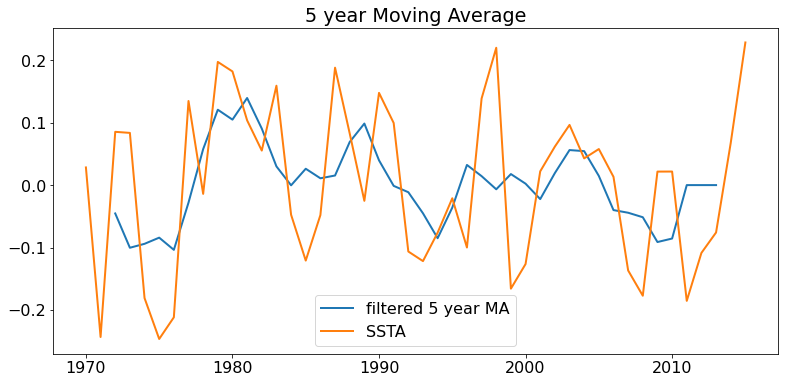

In [155]:
plt.plot(sst_ds.Year[92:-2],ssta_filtered_70[2:-2], label = "filtered 5 year MA")
plt.plot(sst_ds.Year[90:],sst_detrended_1970, label = 'SSTA')
plt.legend()
plt.title("5 year Moving Average")


#plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
#plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
#plt.legend()